In [6]:
# Make a ML model to predict the target variable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the data
# Go one folder back
os.chdir("..")

path = "C:\\Users\\sapta\\OneDrive\\Documents\\GitHub\\M3Challenge2024\\data\\homelessness_bh_ml.csv"
data = pd.read_csv(path)

# Convert the Year column to datetime
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Convert all other columns to numeric.
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        # If data contains '-', use linear interpolation to fill missing values.
        if ' -' in data[col].unique():
            data[col] = data[col].replace(' -', np.nan)

        # Remove commas and convert to numeric
        data[col] = pd.to_numeric(data[col].str.replace(',', ''))

        data[col] = data[col].interpolate(method='linear')

print(data)

         Year  Total number of households  Homeless, priority need  \
0  2008-01-01                    116847.0                    554.0   
1  2009-01-01                    117000.0                    511.0   
2  2010-01-01                    115000.0                    568.0   
3  2011-01-01                    115000.0                    626.0   
4  2012-01-01                    122514.0                    620.0   
5  2013-01-01                    123558.0                    632.0   
6  2014-01-01                    124764.0                    546.0   
7  2015-01-01                    125995.0                    477.0   
8  2016-01-01                    128108.0                    488.0   
9  2017-01-01                    129492.0                    549.0   
10 2018-01-01                    129492.0                    549.0   
11 2019-01-01                    129492.0                    549.0   
12 2020-01-01                    129492.0                    549.0   
13 2021-01-01       

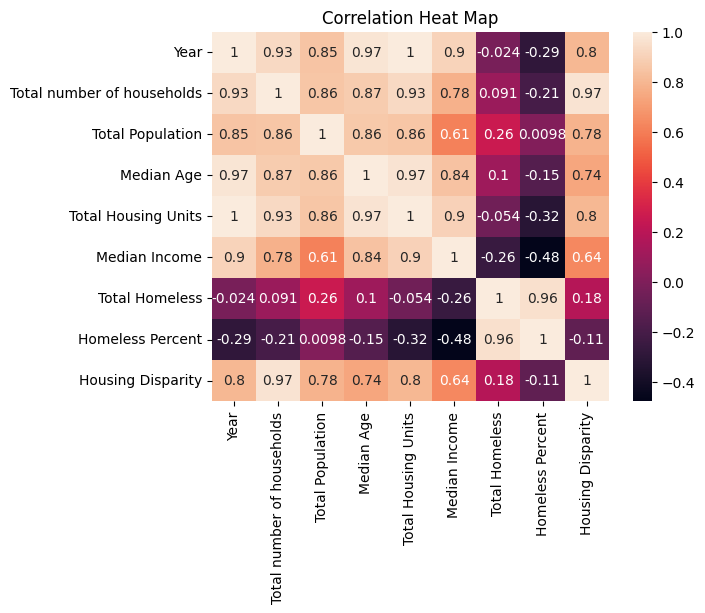

In [7]:
data['Total Homeless'] = data['Homeless, priority need'] + data['Homeless, not priority need']
data['Homeless Percent'] = data['Total Homeless'] / data['Total number of households']
data['Housing Disparity'] = data['Total number of households'] - data['Total Housing Units']
# data['Population Change'] = data['Total Population'] - data['Total Population'].shift(1)
# data['Homeless Change'] = data['Total Homeless'] - data['Total Homeless'].shift(1)

data.drop(['Homeless, priority need', 'Homeless, not priority need', 'Eligible but not homeless'], axis=1, inplace=True)

# Make a correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heat Map')
# data.drop(['Homeless Percent'], axis=1, inplace=True)
plt.show()

data_copy = data.copy()

Mean Squared Error: 4154.402188593404
R^2: 0.8523684912940325
Coefficients: [ 2.07421362e+02 -1.36089914e-01  1.58885107e-02  1.36992825e+02
 -2.80446420e-01 -3.45012819e-02  1.44356506e-01]


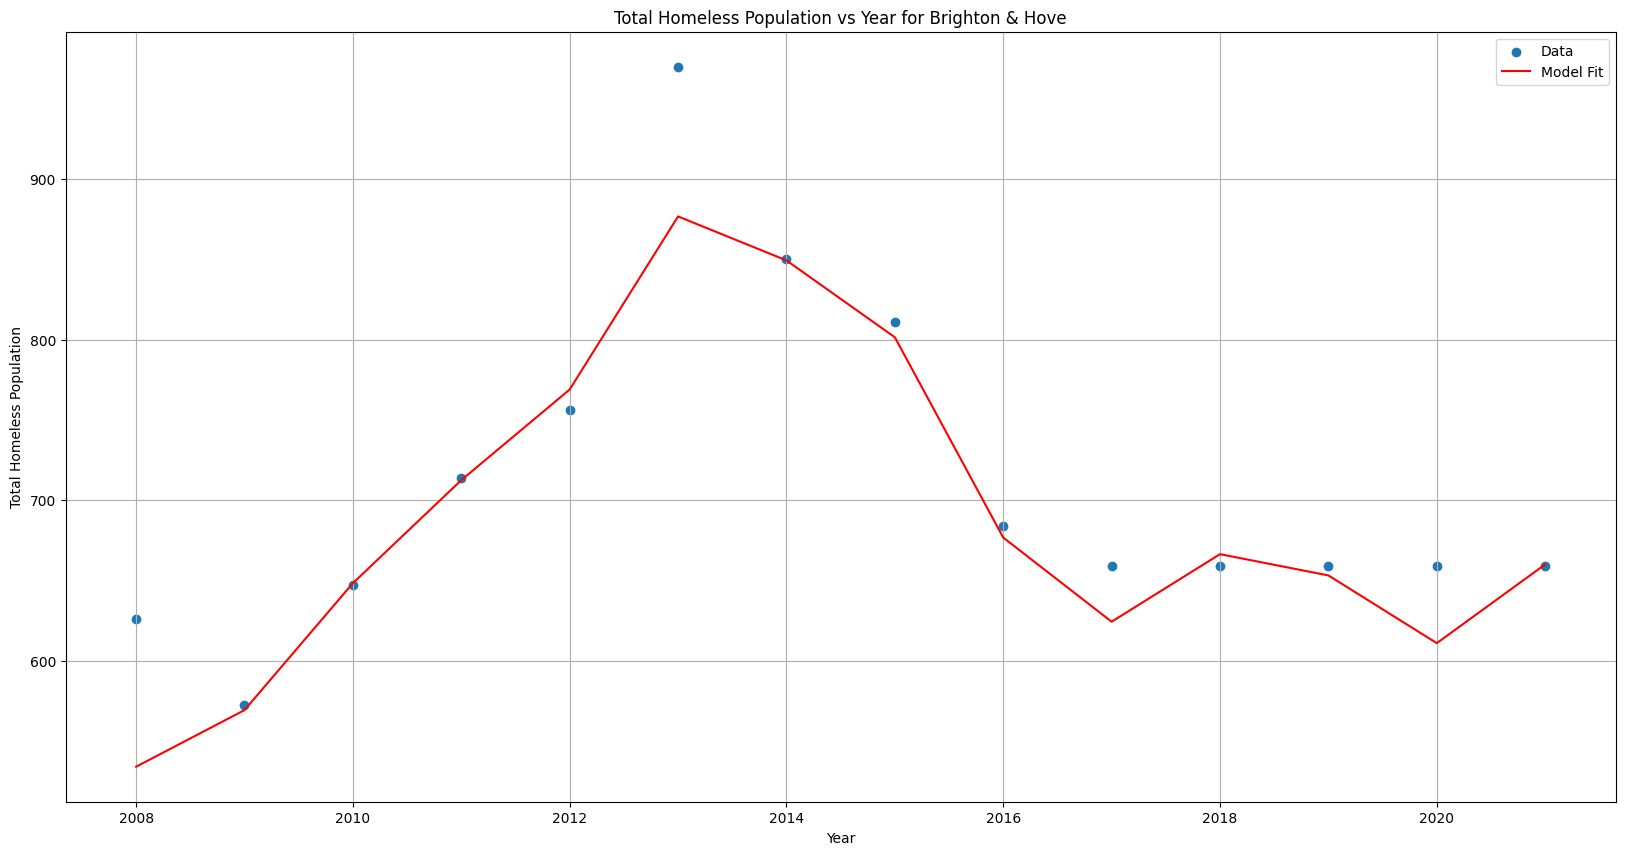

In [8]:
from sklearn.model_selection import train_test_split

# Convert the Year column to numeric
data['Year'] = data['Year'].dt.year

# Split the data into training and testing sets
# Drop other variable
data.fillna(0, inplace=True)

data.drop(['Homeless Percent'], axis=1, inplace=True)


X = data.drop(['Total Homeless'], axis=1)
y = data['Total Homeless']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# R^2 score
r2 = model.score(X, y)
print('R^2:', r2)

# Print the coefficients
print('Coefficients:', model.coef_)

# Plot the fit.
# X = np.linspace(data['Year'].min(), data['Year'].max() + 50, 1)
pred = model.predict(X)
plt.figure(figsize=(20, 10))
plt.scatter(data['Year'], data['Total Homeless'])
plt.plot(data['Year'], pred, color='red')
plt.title('Total Homeless Population vs Year for Brighton & Hove')
plt.xlabel('Year')
plt.ylabel('Total Homeless Population')
plt.legend(['Data', 'Model Fit'])
plt.grid()
plt.show()

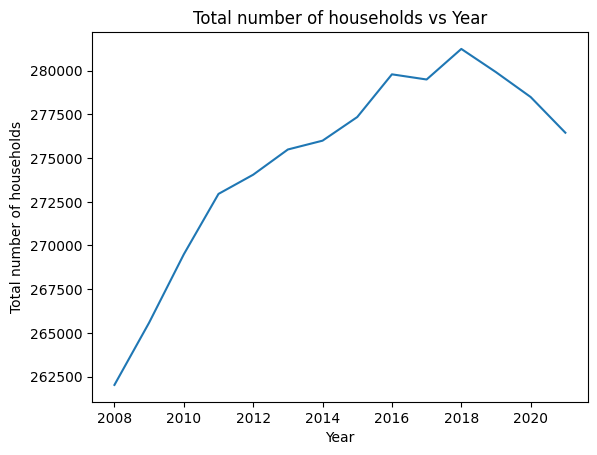

In [9]:
# Make models for Total number of households, Total Population, Total Housing Units, and Median Income
total_households = data['Total number of households']
total_population = data['Total Population']
total_housing_units = data['Total Housing Units']
median_income = data['Median Income']

# Plot over time.
plt.plot(data['Year'], total_population)
plt.title('Total number of households vs Year')
plt.xlabel('Year')
plt.ylabel('Total number of households')
plt.show()

In [10]:
# Train a model
from pycaret.time_series import TSForecastingExperiment
s = TSForecastingExperiment()

s.setup(data=data_copy, session_id=42, target='Homeless Percent', numeric_imputation_target='mean', numeric_imputation_exogenous='mean')

best = s.compare_models()

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
# OOP API
s.plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 50})